# Box-Jenkins method

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
flow = pd.read_csv('../../New_flow/GD1351_R_new.csv')

## 1. Identification

### 1.1 Plot the time series

In [6]:
flow.head()

,timeStamp,flow,newFlow
0,2019-08-05 00:00:00,3.0,3.0
1,2019-08-05 00:15:00,4.0,4.0
2,2019-08-05 00:30:00,3.0,3.0
3,2019-08-05 00:45:00,3.0,3.0
4,2019-08-05 01:00:00,2.0,2.0


In [23]:
#select data from 2019-11-21 to 2019-12-20
start_index = flow.loc[flow['timeStamp'] == '2019-11-21 00:00:00'].index.item()
new_flow = flow[start_index:start_index+(96*30)].reset_index(drop=True)

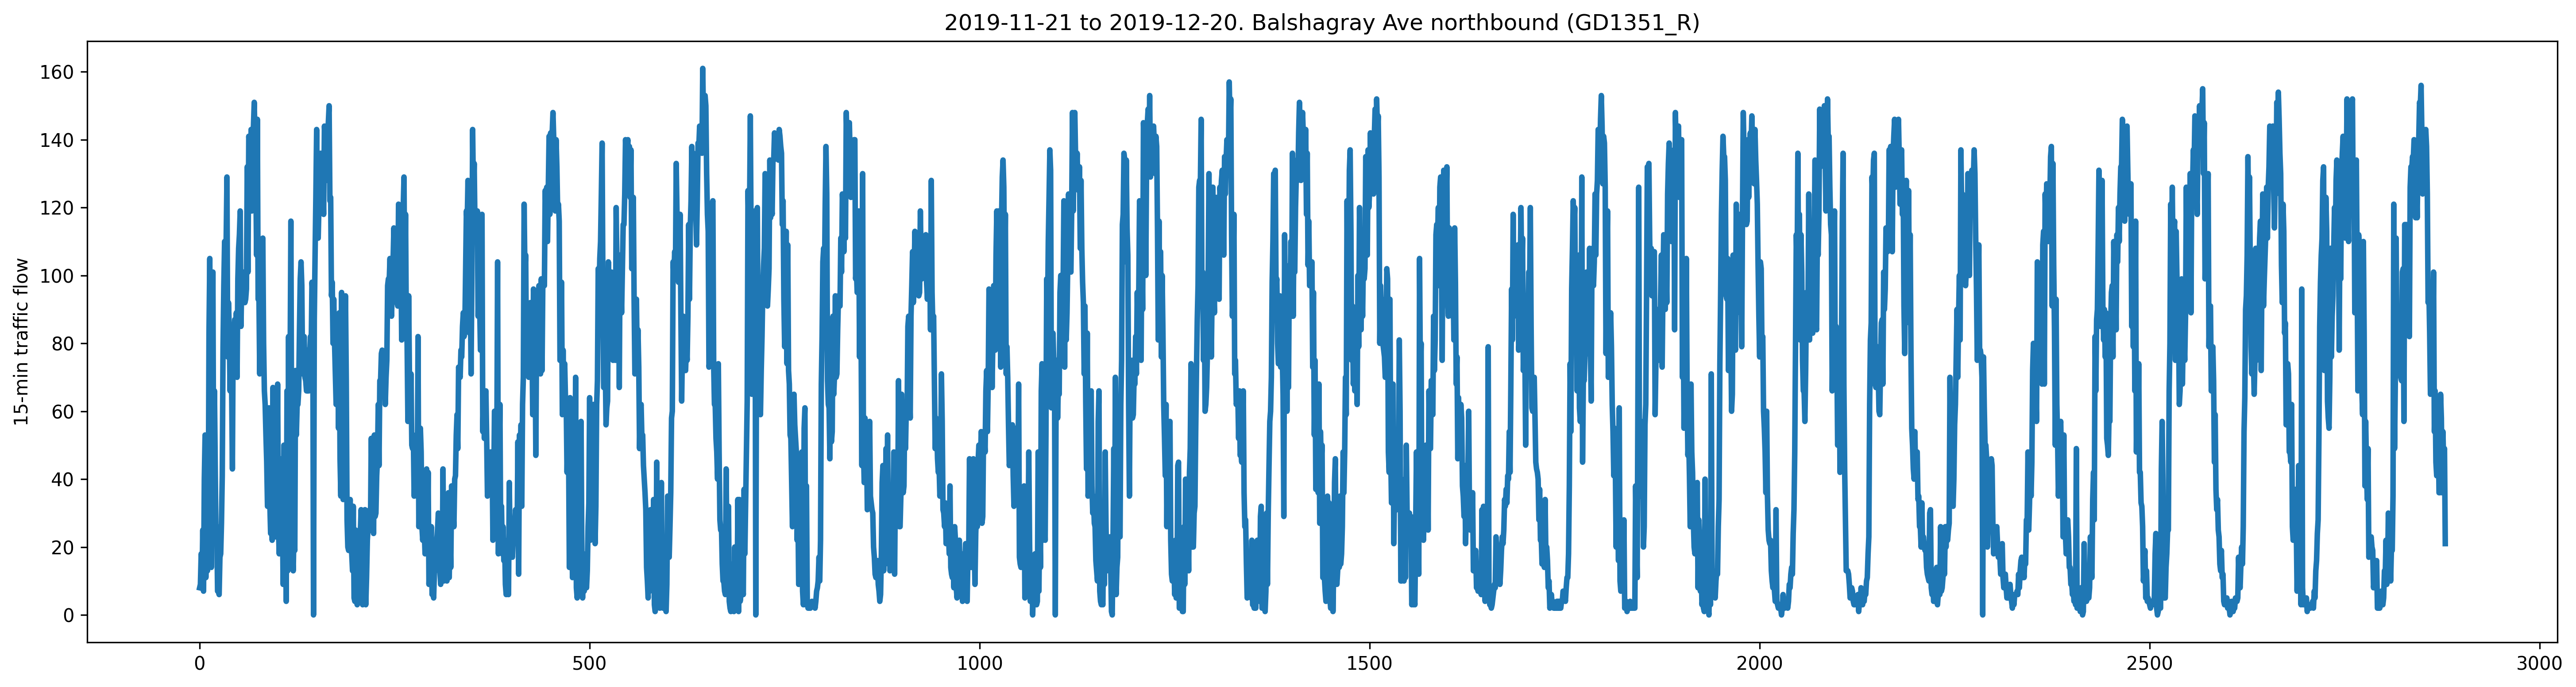

In [25]:
figure(figsize=(24, 6), dpi=300)

plt.plot(list(new_flow['newFlow']),
        label=flow['timeStamp'], linewidth=3)

plt.title('2019-11-21 to 2019-12-20. Balshagray Ave northbound (GD1351_R)')
plt.ylabel('15-min traffic flow')

plt.show()

### 1.2 Use augmented Dicky-Fuller test

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
trend_test = adfuller(new_flow['newFlow'])
print(trend_test)

(-12.242551629838424, 9.949433641248377e-23, 28, 2851, {'1%': -3.43264575500919, '5%': -2.862554307267278, '10%': -2.567309945727228}, 24688.619194237628)


### 1.3 Identify seasonal trend

#### 1.3.1 Plot ACF to indentify the seasonal period

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

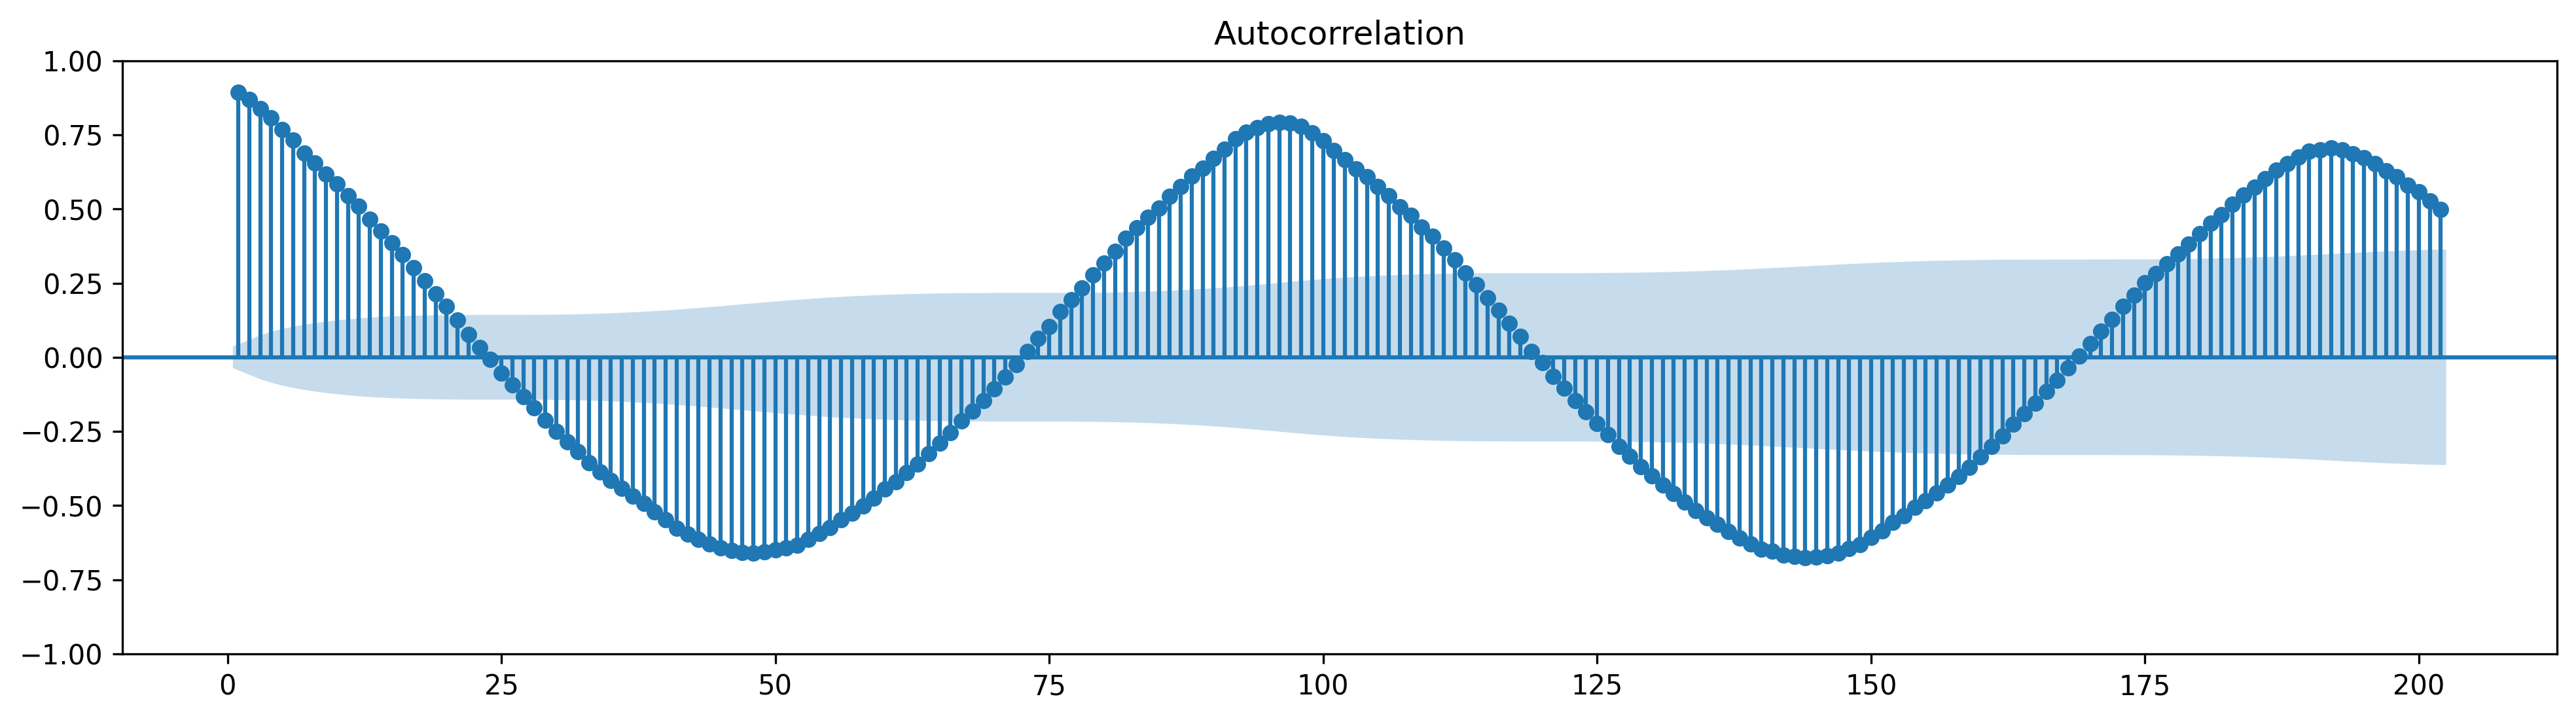

In [35]:
# Create the figure
fig, ax = plt.subplots(1,1,figsize=(16,4),dpi=300)
# Plot ACF
plot_acf(new_flow['newFlow'], ax=ax, lags=(96*2+10), zero=False)
plt.show()

#### 1.3.2 Decompose data

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

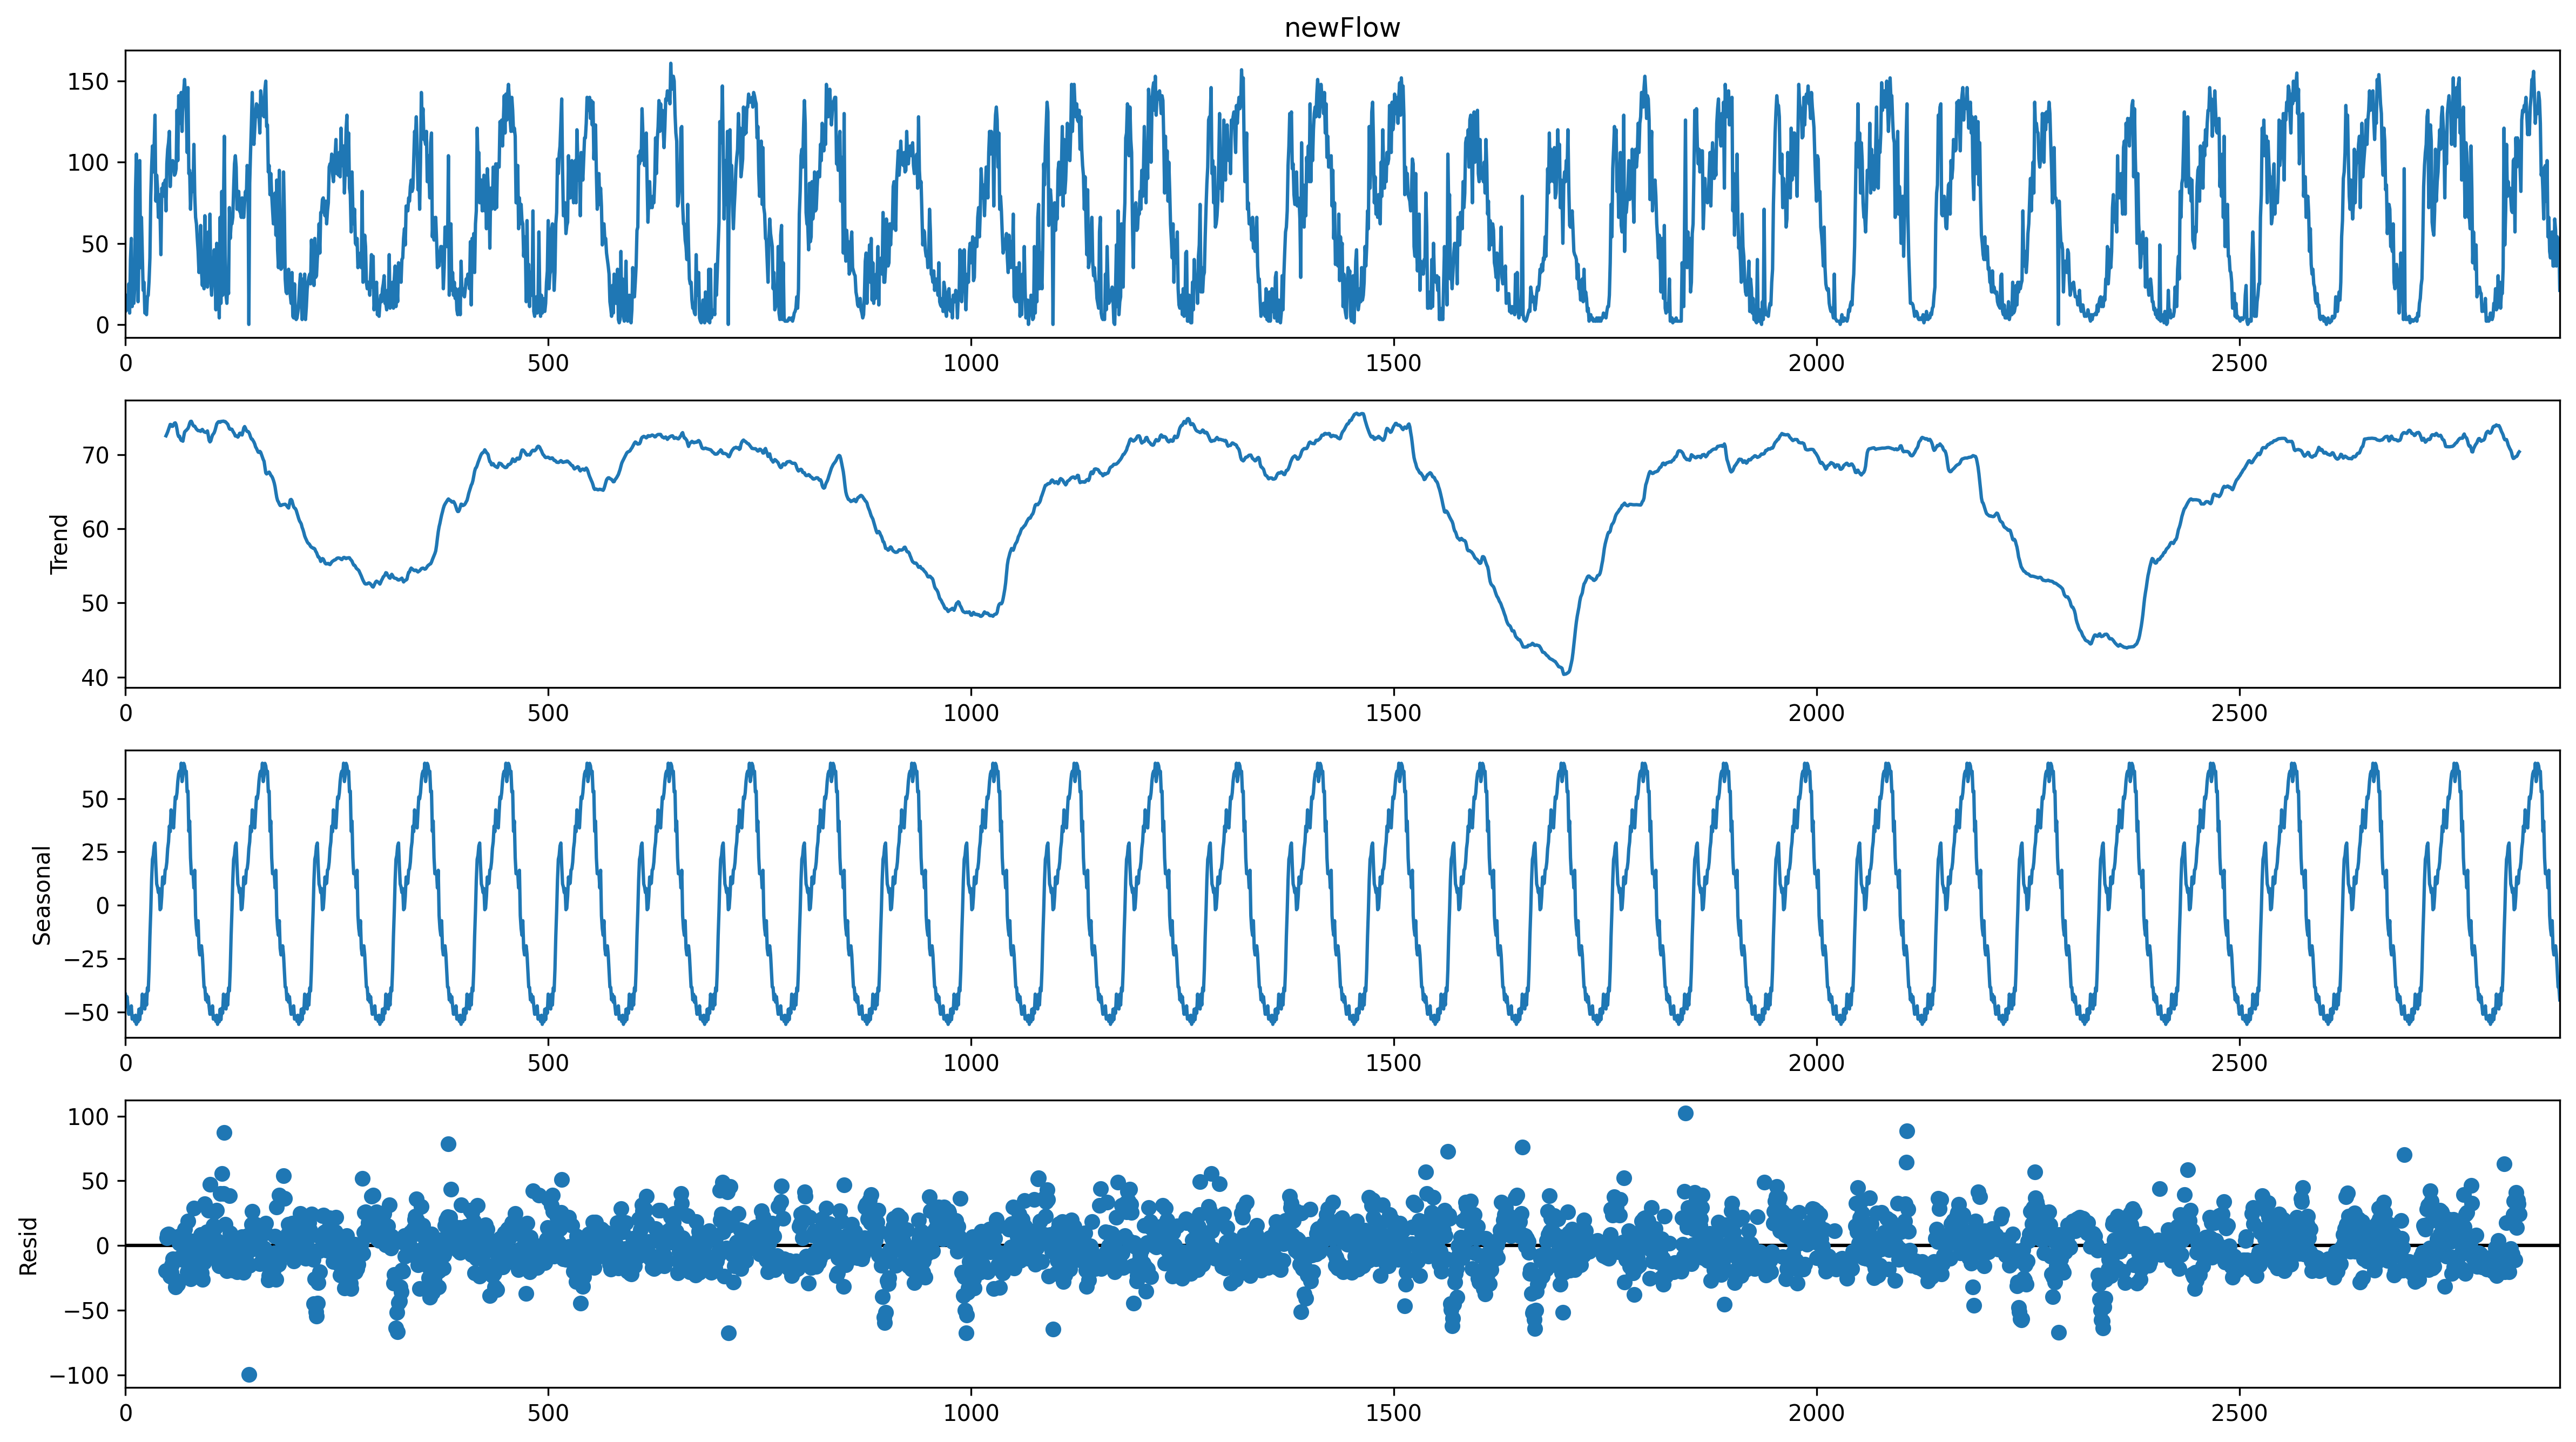

In [54]:
decomp_results = seasonal_decompose(new_flow['newFlow'], period=96)

# Plot decomposed data
plt.rc("figure",figsize=(16,9),dpi=300)
decomp_results.plot()

plt.show()

#### 1.3.3 Take seasonal differencing to make the data stationary

In [63]:
flow_diff = new_flow['newFlow'].diff(96).dropna()

#### 1.3.4 Plot seasonal ACF/PACF 

E:\program\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


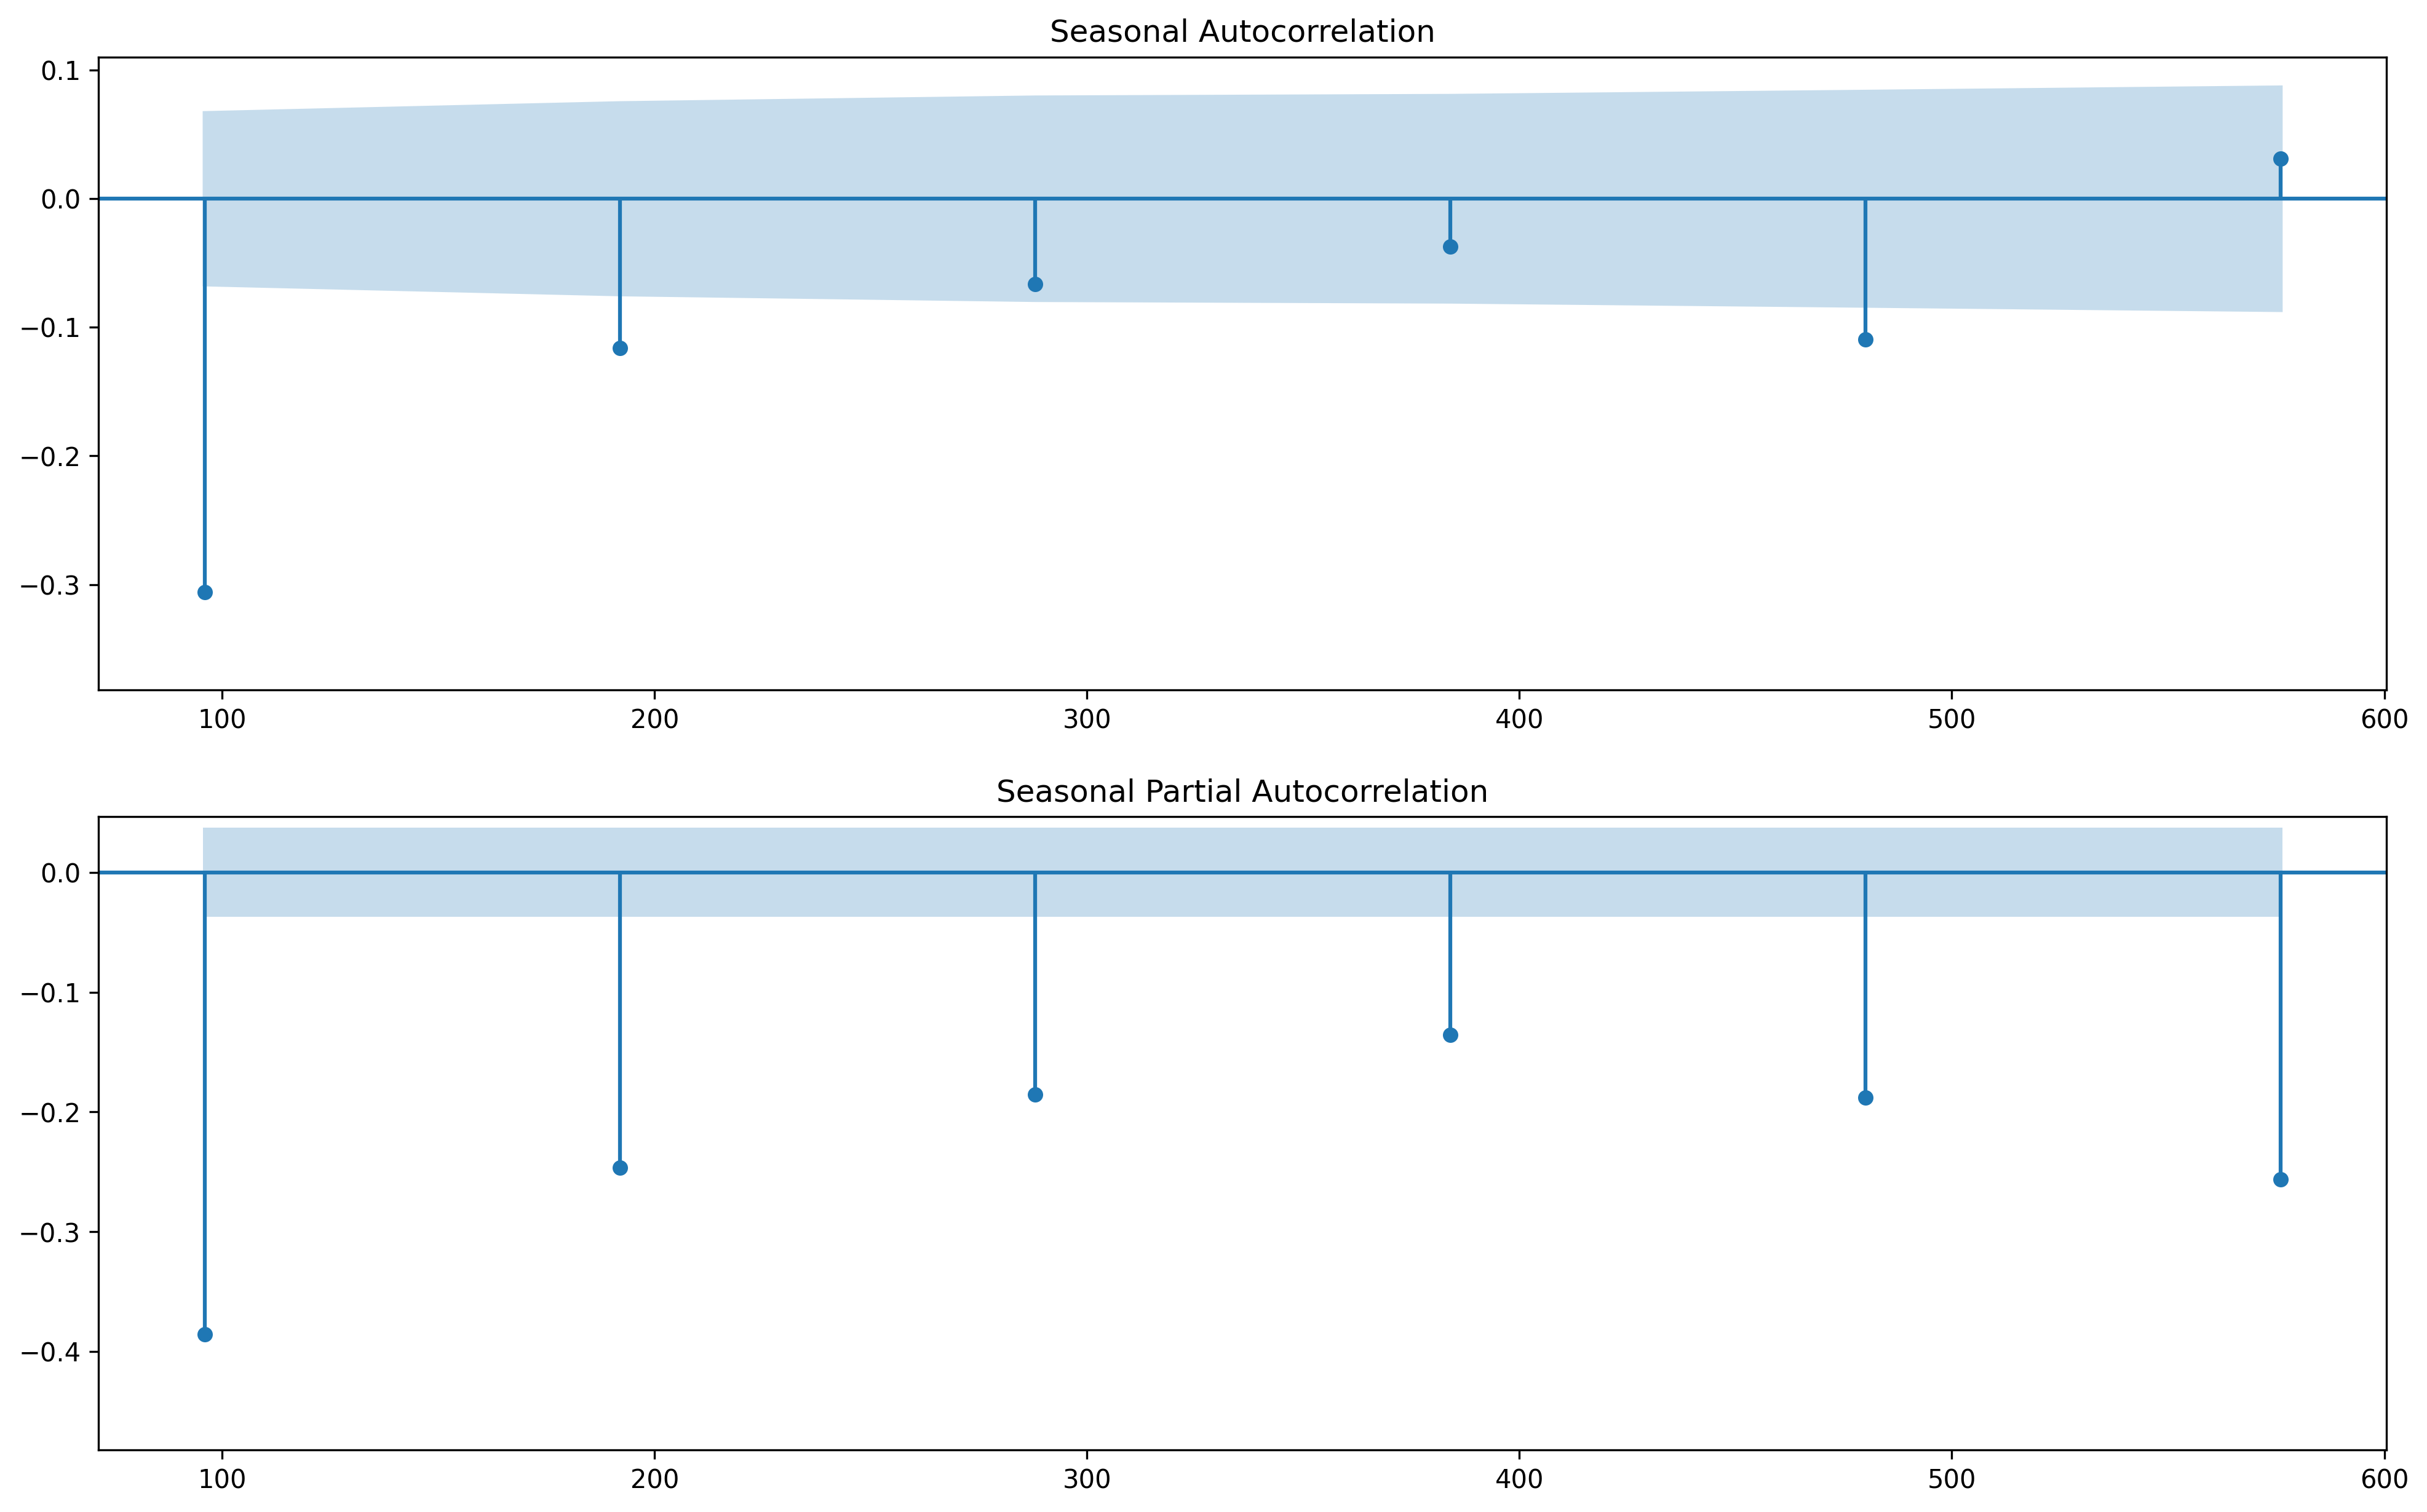

In [68]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10), dpi=300)
# Plot seasonal ACF
plot_acf(flow_diff, lags=[96,96*2,96*3,96*4,96*5,96*6], ax=ax1, auto_ylims=True, title='Seasonal Autocorrelation')
# Plot seasonal PACF
plot_pacf(flow_diff, lags=[96,96*2,96*3,96*4,96*5,96*6], ax=ax2, auto_ylims=True, title='Seasonal Partial Autocorrelation')

plt.show()

#### 1.3.4 Plot ACF/PACF

E:\program\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


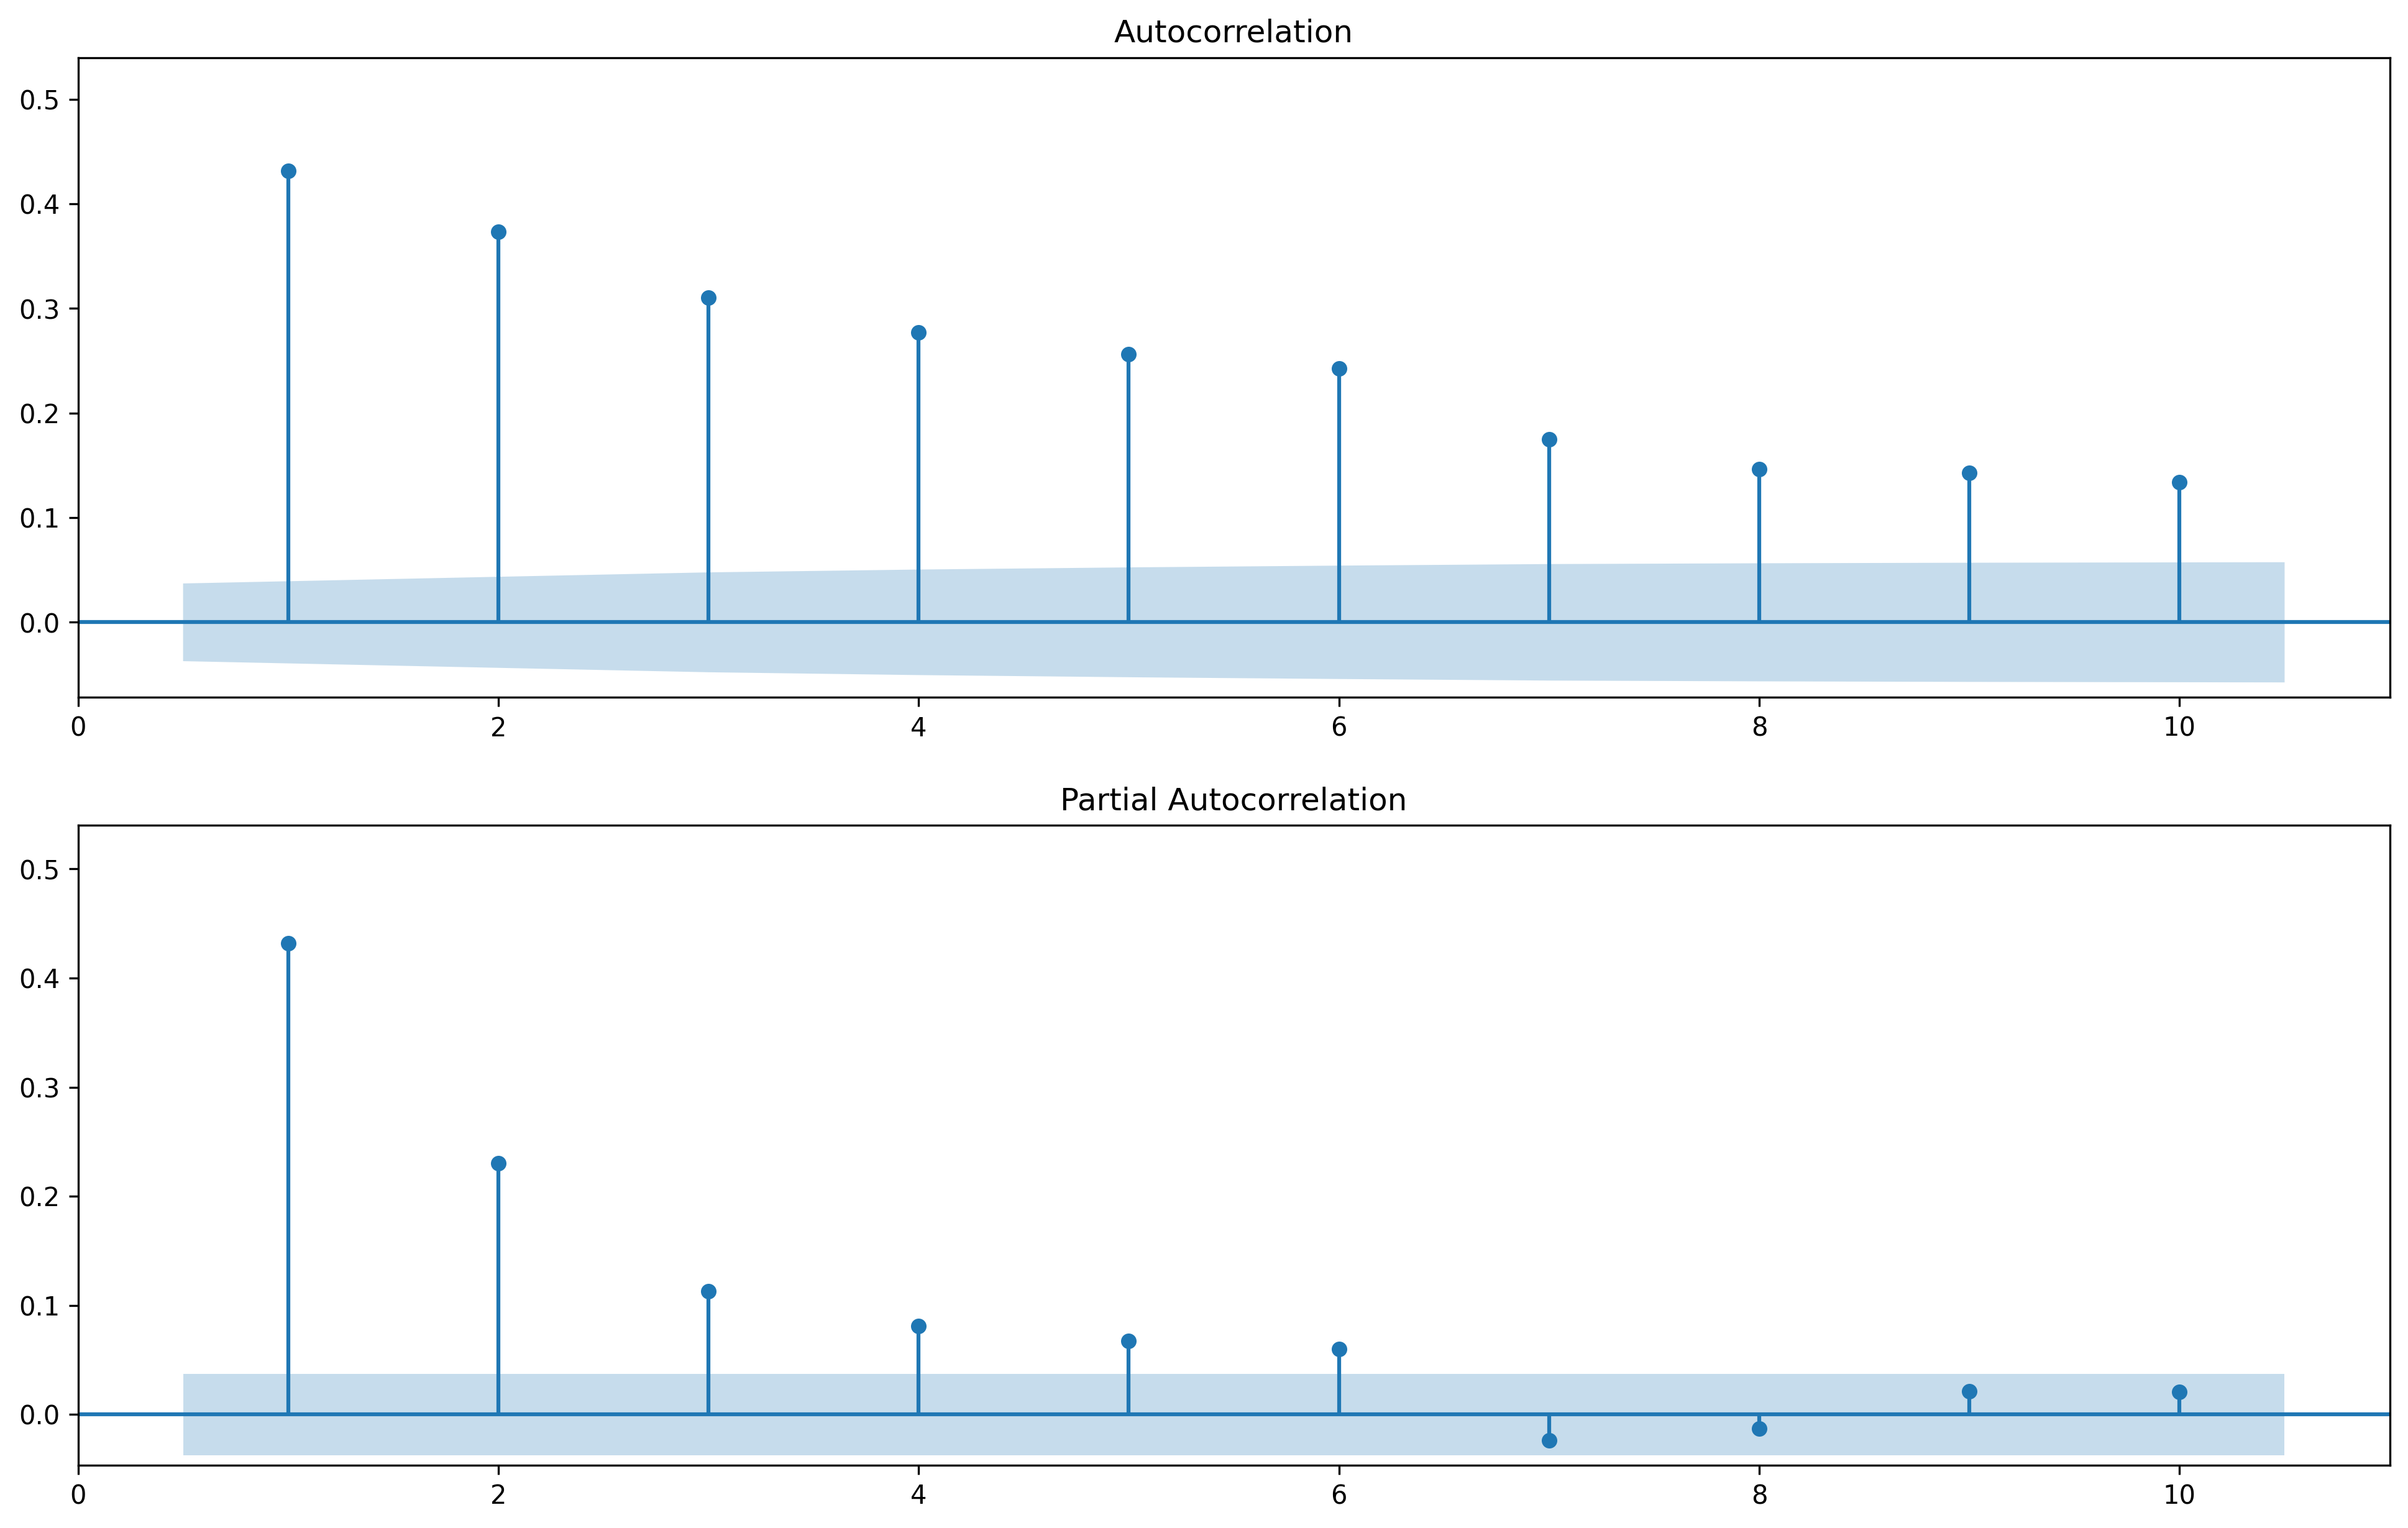

In [72]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,10), dpi=300)
# Make ACF plot
plot_acf(flow_diff, lags=10, zero=False, ax=ax1,auto_ylims=True)
# Make PACF plot
plot_pacf(flow_diff, lags=10, zero=False, ax=ax2,auto_ylims=True)

plt.show()

## 2. Estimation

In [2]:
from statsmodels.tsa.arima.model import ARIMA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
flow = pd.read_csv('../../New_flow/GD1351_R_predict_2019-11-20.csv').sort_values(by=['timeStamp(t+12)']).reset_index(drop=True)
start_index = flow.loc[flow['timeStamp(t+12)'] == '2019-11-21 00:00:00'].index.item()
end_index = flow.loc[flow['timeStamp(t+12)'] == '2019-12-21 00:00:00'].index.item()
new_flow = flow.iloc[start_index:end_index, 1:].reset_index(drop=True)
index = new_flow['timeStamp(t+12)']
test_flow = flow.iloc[end_index:(end_index+(96*7)), 1:].reset_index(drop=True)
new_flow
#test_flow

,timeStamp(t+12),time(t+12),newFlow(t+12)
0,2019-11-21 00:00:00,0.00,8.0
1,2019-11-21 00:15:00,0.25,9.0
2,2019-11-21 00:30:00,0.50,18.0
3,2019-11-21 00:45:00,0.75,9.0
4,2019-11-21 01:00:00,1.00,25.0
...,...,...,...
2875,2019-12-20 22:45:00,22.75,36.0
2876,2019-12-20 23:00:00,23.00,54.0
2877,2019-12-20 23:15:00,23.25,44.0
2878,2019-12-20 23:30:00,23.50,49.0


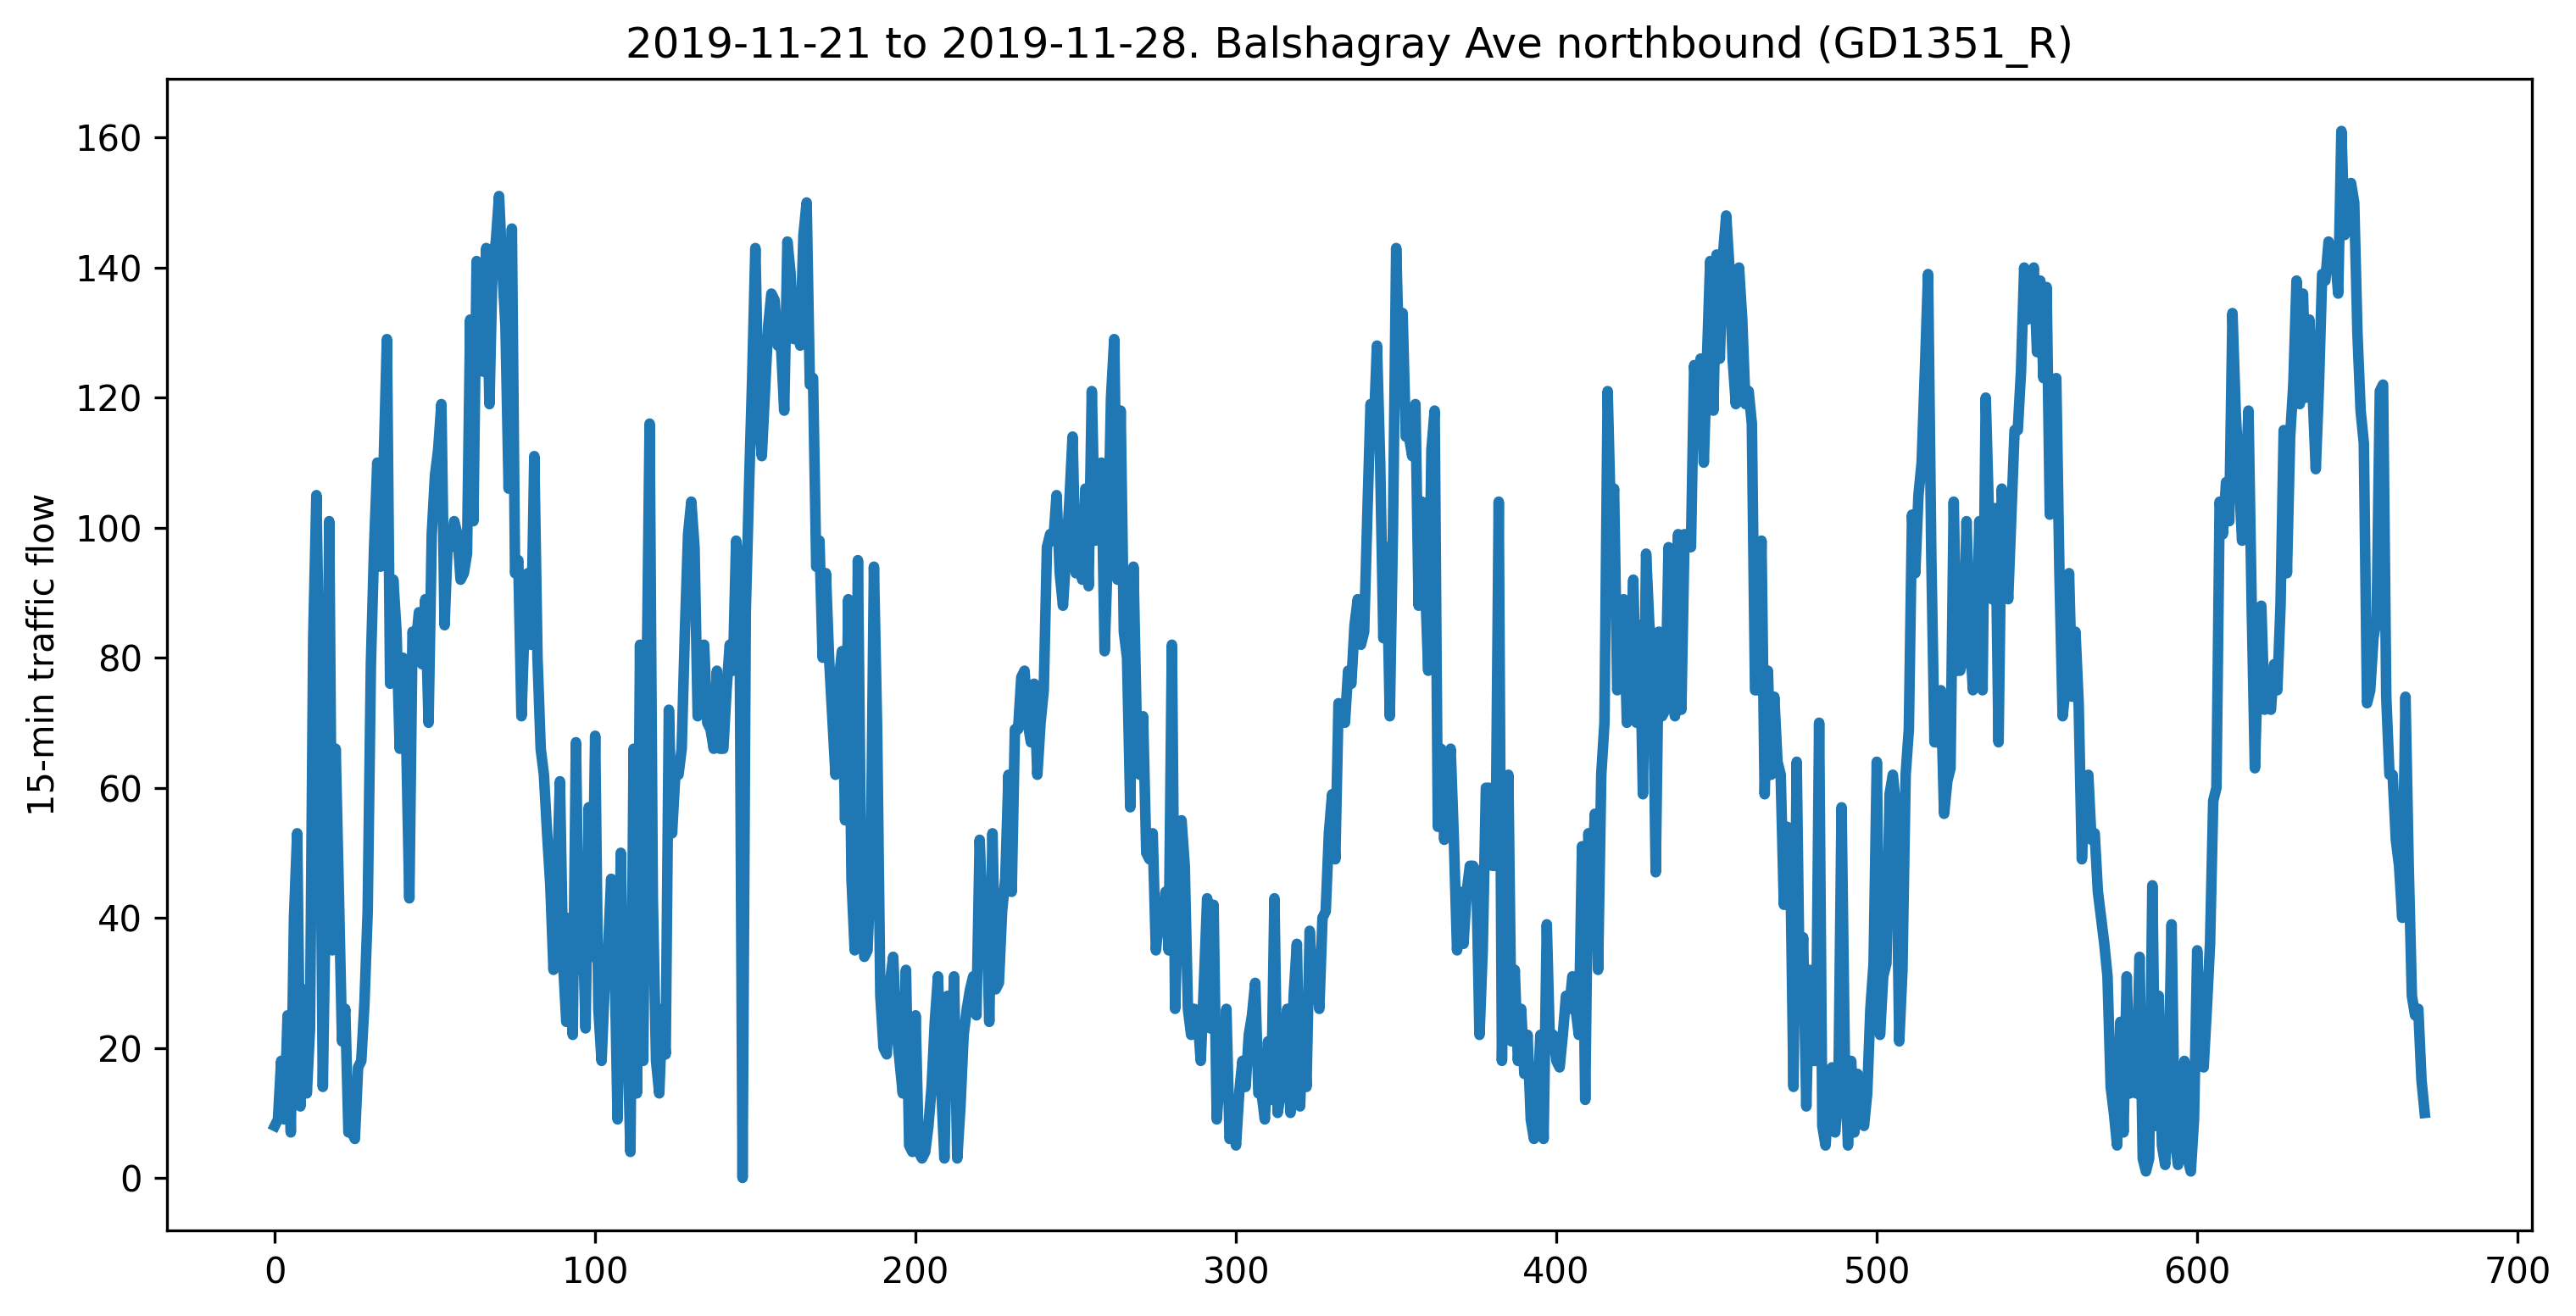

In [5]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=300)
plt.plot(list(new_flow['newFlow(t+12)'][0:96*7]),
        label=index, linewidth=3)
plt.title('2019-11-21 to 2019-11-28. Balshagray Ave northbound (GD1351_R)')
plt.ylabel('15-min traffic flow')
plt.show()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

E:\program\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


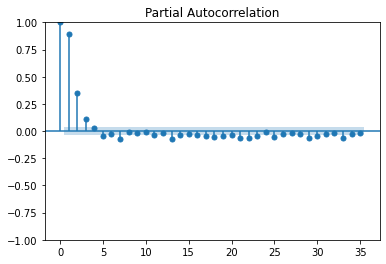

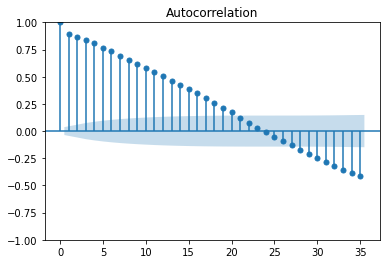

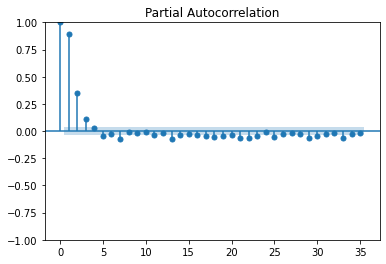

In [7]:
plot_acf(new_flow[['newFlow(t+12)']])
plot_pacf(new_flow[['newFlow(t+12)']])

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(new_flow[['newFlow(t+12)']])
print(f'p-value: {adf_test[1]}')

p-value: 9.949433641248377e-23


In [9]:
df_train_diff = new_flow[['newFlow(t+12)']].diff().dropna()

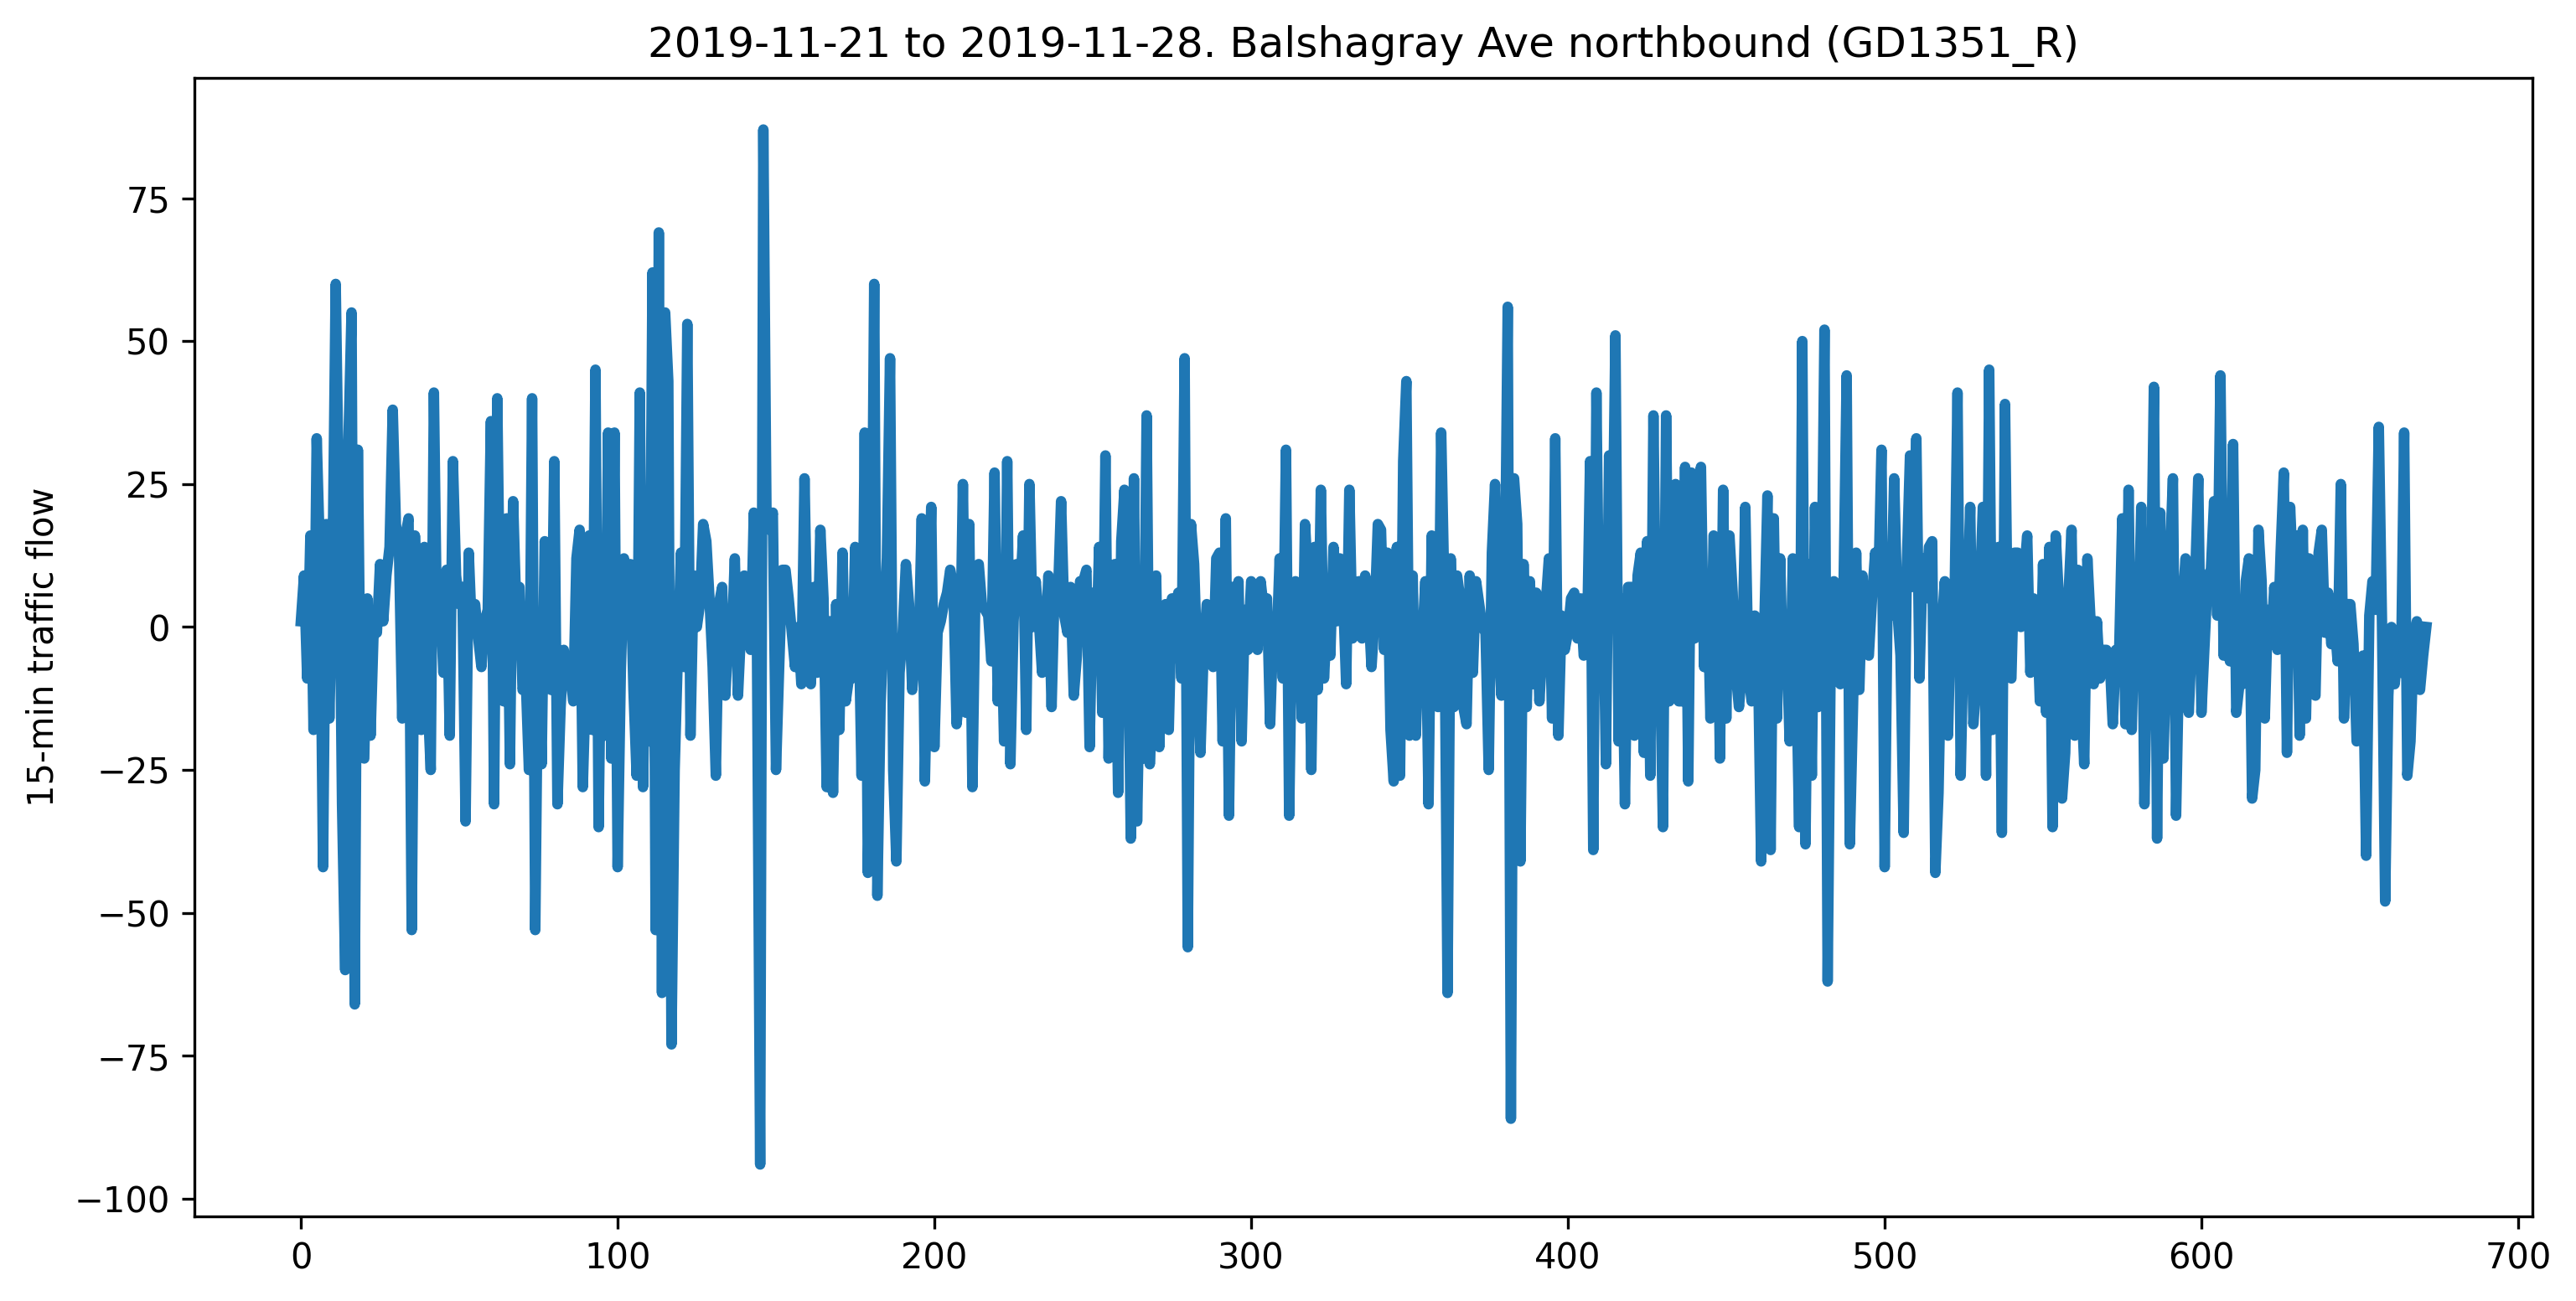

In [10]:
figure(figsize=(12, 6), dpi=300)
plt.plot(list(df_train_diff['newFlow(t+12)'][0:96*7]),
        label=index, linewidth=3)
plt.title('2019-11-21 to 2019-11-28. Balshagray Ave northbound (GD1351_R)')
plt.ylabel('15-min traffic flow')
plt.show()

E:\program\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


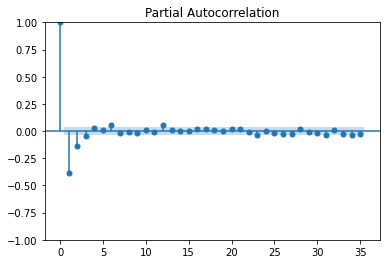

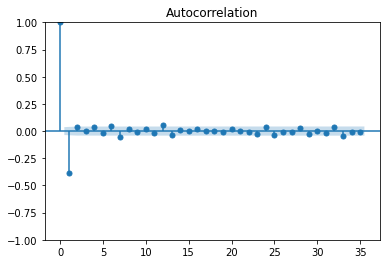

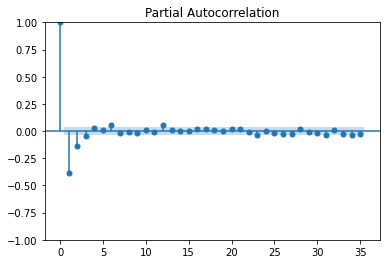

In [11]:
plot_acf(df_train_diff)
plot_pacf(df_train_diff)

In [60]:
#(2,1,0)/(2,1,1)
model = ARIMA(new_flow[['newFlow(t+12)']], order=(2,0,2))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          newFlow(t+12)   No. Observations:                 2880
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -12468.820
Date:                Wed, 30 Aug 2023   AIC                          24949.641
Time:                        17:57:57   BIC                          24985.434
Sample:                             0   HQIC                         24962.542
                               - 2880                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.9146      1.438     45.130      0.000      62.095      67.734
ar.L1          1.9671      0.006    331.900      0.000       1.955       1.979
ar.L2         -0.9713      0.006   -167.628      0.000      -0.983      -0.960
ma.L1         -1.4639      0.014   -103.680      0.000      -1.492      -1.436
ma.L2          0.4804      0.014     34.253      0.000       0.453       0.508
sigma2       336.9994      7.199     46.815      0.000     322.890     351.108
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               380.35
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
all_flow = flow.iloc[start_index:(end_index+(96*7)), 3:].reset_index(drop=True)
all_flow

,newFlow(t+12)
0,8.0
1,9.0
2,18.0
3,9.0
4,25.0
...,...
3547,35.0
3548,26.0
3549,43.0
3550,31.0


<AxesSubplot:>

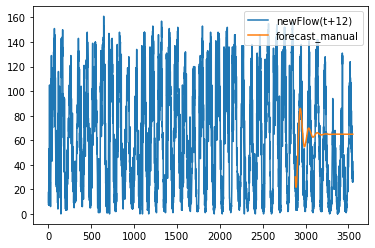

In [53]:
forecast_test = model_fit.forecast(len(test_flow))

all_flow['forecast_manual'] = [None]*len(new_flow[['newFlow(t+12)']]) + list(forecast_test)

all_flow.plot()

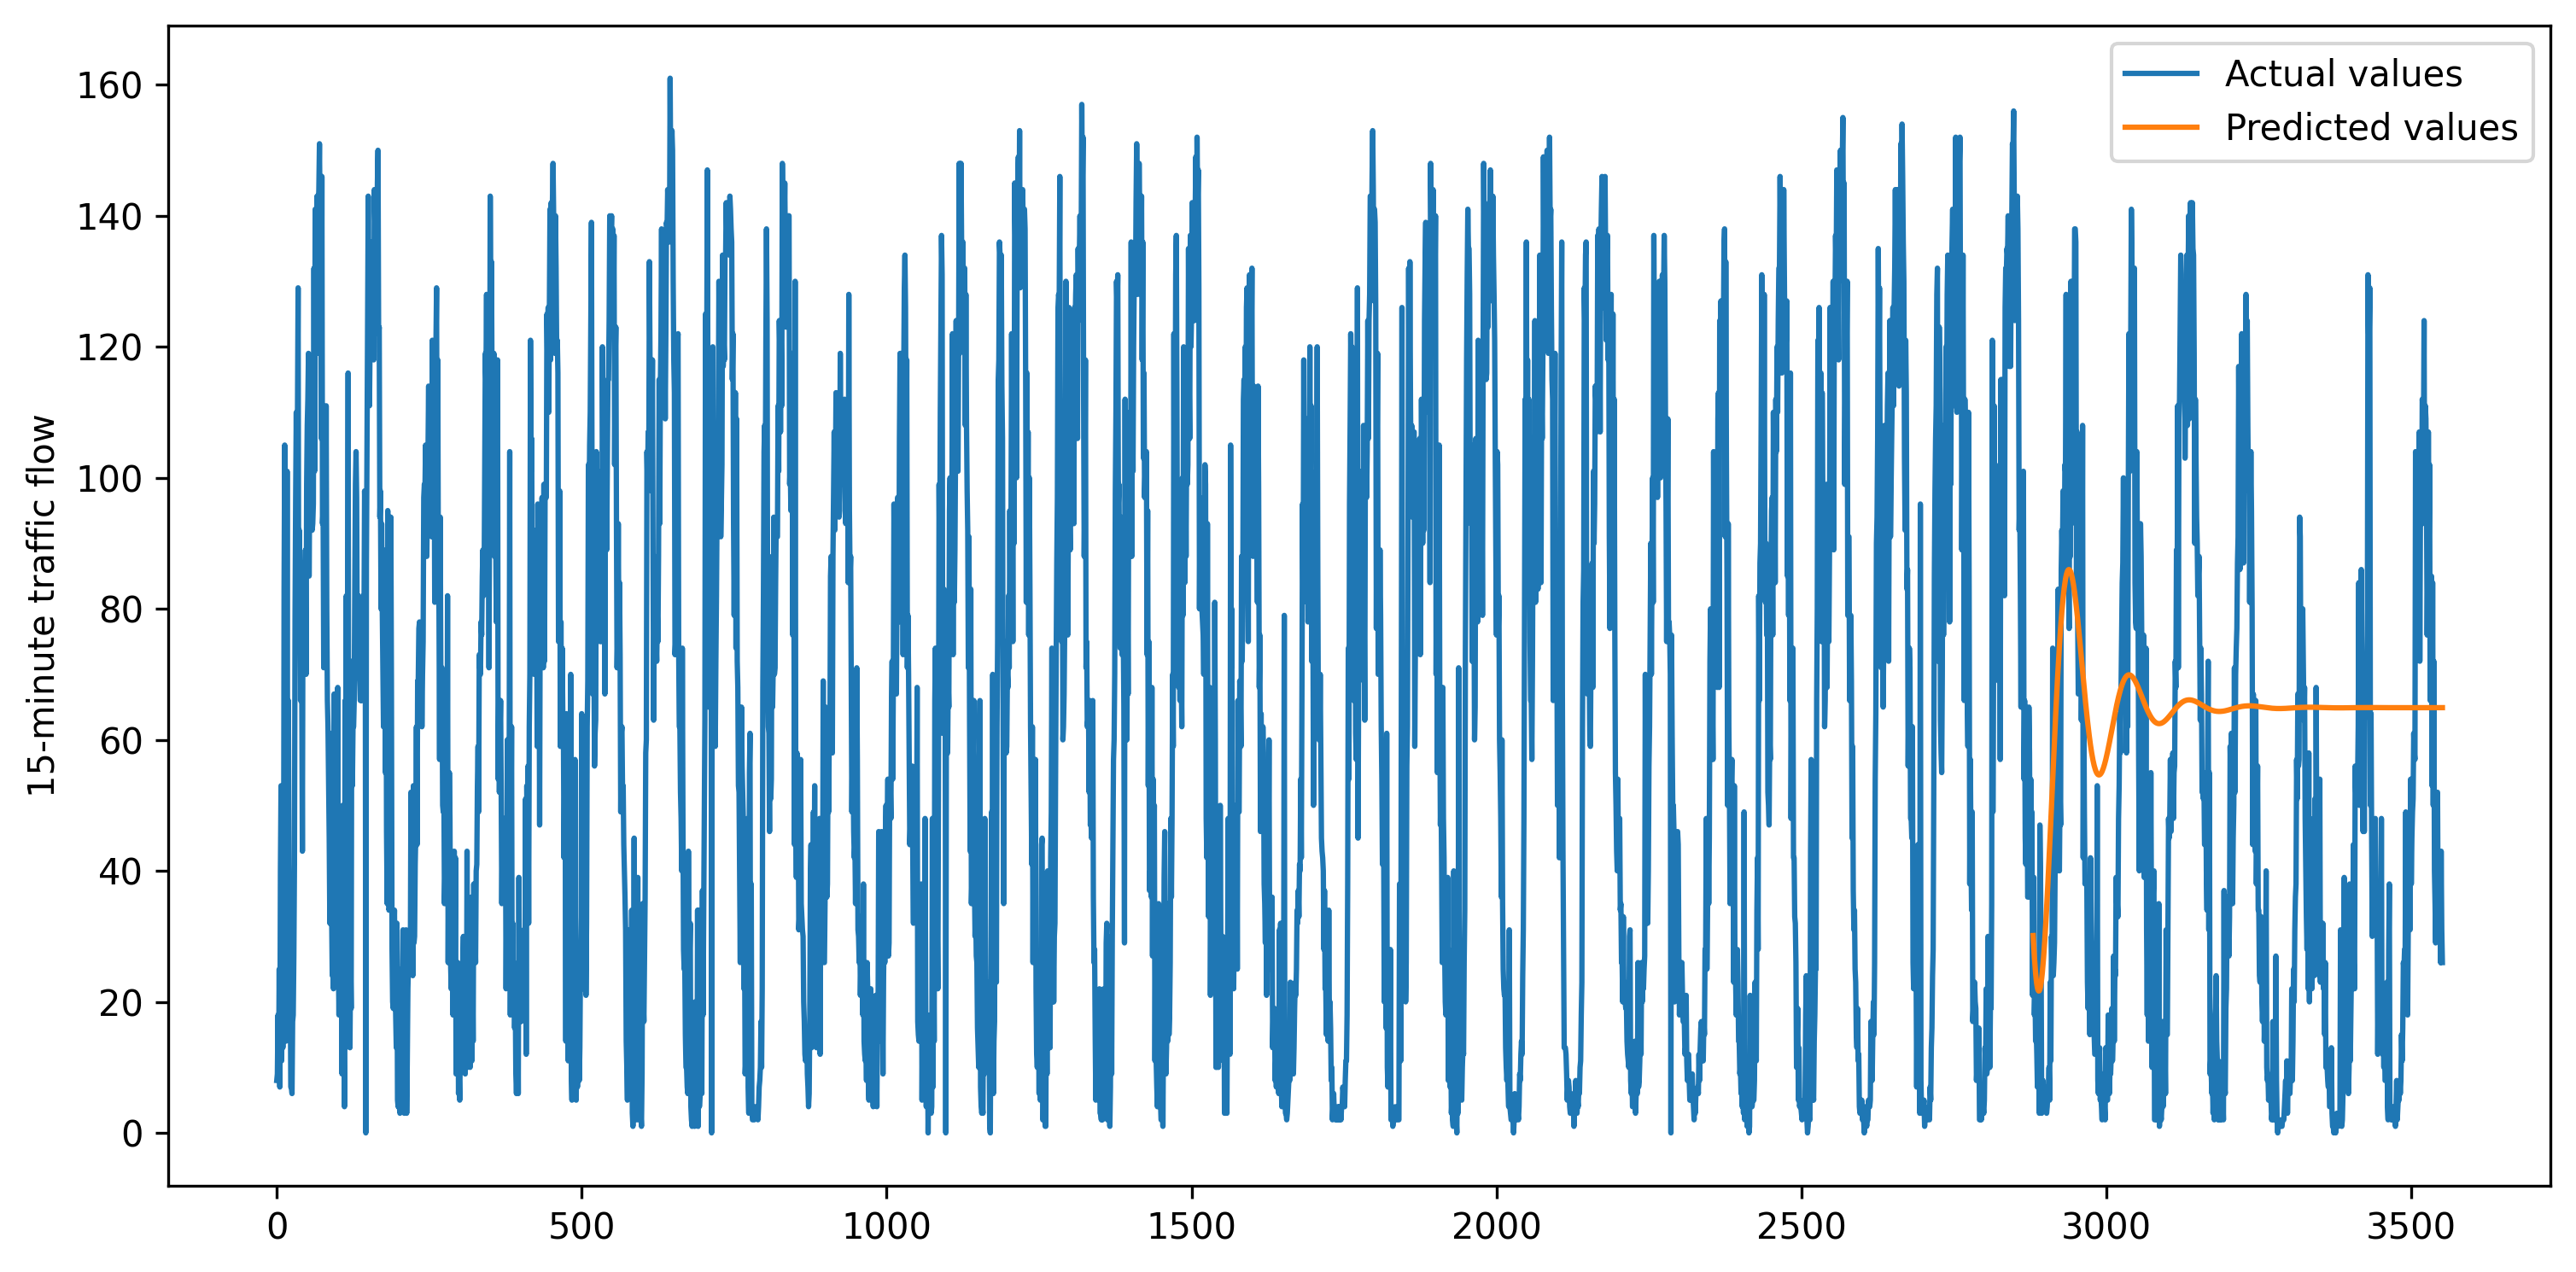

In [55]:
figure(figsize=(12, 6), dpi=300)
plt.plot(list(all_flow['newFlow(t+12)']), label = "Actual values")
plt.plot(list(all_flow['forecast_manual']), label = "Predicted values")
plt.legend()
plt.ylabel('15-minute traffic flow')
plt.show()

In [45]:
import pmdarima as pm
auto_arima = pm.auto_arima(new_flow[['newFlow(t+12)']], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)